In [21]:
%pip install wordcloud
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 26.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/11.0 MB 17.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.0 MB 32.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.7/11.0 MB 44.6 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 43.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------------------- 301.8/301.8 kB 19.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   - -------------------------------------- 2.2/44.8 MB 133.8 MB/s eta 0:00:01
   - ---


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Successfully loaded 130667 rows from merged_data_with_categories.csv.
Number of valid reviews: 121358
Top 10 Keywords:
   keyword     score
18      너무  0.048626
86      책을  0.032203
66      있는  0.031774
76      정말  0.029503
81      좋은  0.023875
21      대한  0.023524
60      읽고  0.022764
20      다시  0.018719
68    있습니다  0.017708
90    책입니다  0.017387


C:\Users\mcvv0\AppData\Local\Temp\ipykernel_11056\3507864144.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keyword_data.head(20), x="score", y="keyword", palette="viridis")


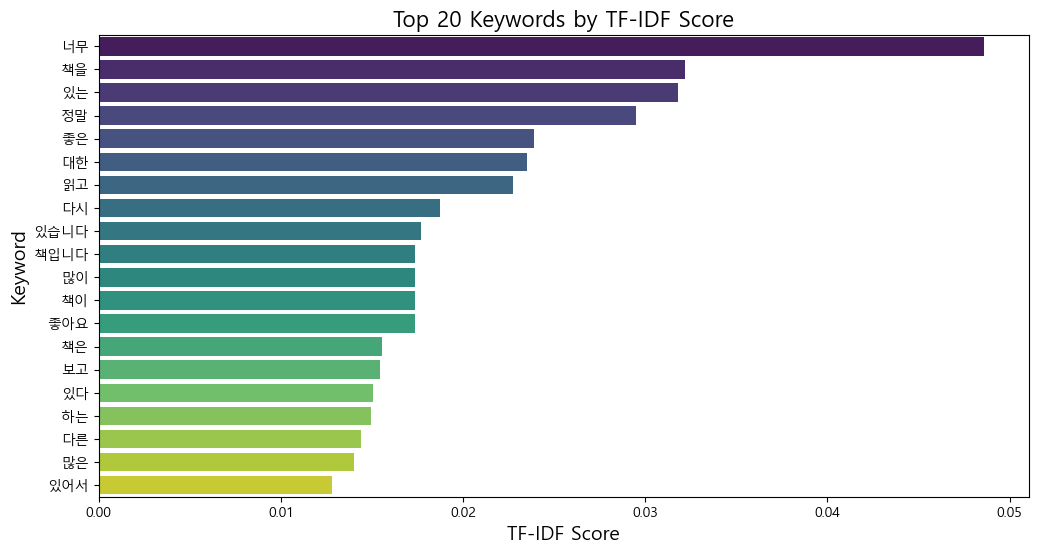

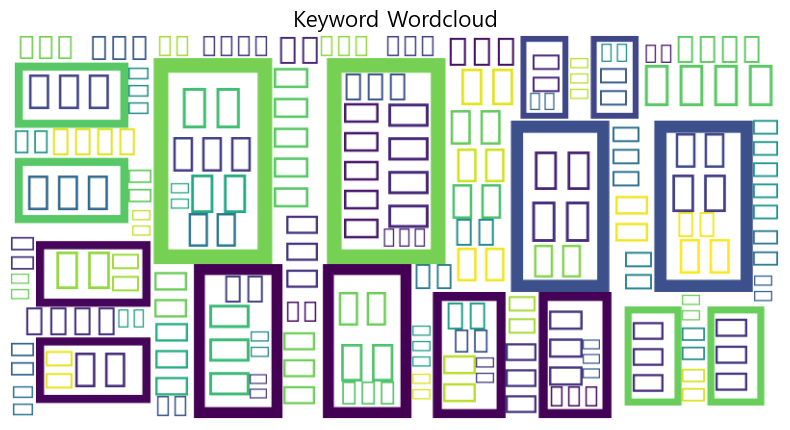

Keyword data saved to keyword_data.csv.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# 1. 데이터 로드
input_file = "merged_data_with_categories.csv"  # 데이터 파일 경로
try:
    data = pd.read_csv(input_file, encoding="utf-8")
    print(f"Successfully loaded {len(data)} rows from {input_file}.")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# 2. 유효 리뷰 필터링
valid_reviews = data[data["review_content"] != "리뷰없음"]
print(f"Number of valid reviews: {len(valid_reviews)}")

# 3. TF-IDF 기반 키워드 추출
vectorizer = TfidfVectorizer(stop_words="english", max_features=100)
tfidf_matrix = vectorizer.fit_transform(valid_reviews["review_content"])
tfidf_scores = tfidf_matrix.toarray()

# 키워드 데이터 생성
keywords = vectorizer.get_feature_names_out()
average_scores = tfidf_scores.mean(axis=0)
keyword_data = pd.DataFrame({
    "keyword": keywords,
    "score": average_scores
}).sort_values(by="score", ascending=False)

print("Top 10 Keywords:")
print(keyword_data.head(10))

# 4. 키워드 분포 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_data.head(20), x="score", y="keyword", palette="viridis")
plt.title("Top 20 Keywords by TF-IDF Score", fontsize=16)
plt.xlabel("TF-IDF Score", fontsize=14)
plt.ylabel("Keyword", fontsize=14)
plt.show()

# 5. 워드클라우드 생성
wordcloud = WordCloud(
    background_color="white",
    width=800,
    height=400
).generate_from_frequencies(dict(zip(keyword_data["keyword"], keyword_data["score"])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Keyword Wordcloud", fontsize=16)
plt.show()

# 6. 결과 저장
output_file = "keyword_data.csv"
keyword_data.to_csv(output_file, index=False, encoding="utf-8-sig")
print(f"Keyword data saved to {output_file}.")
